In [3]:
from google.colab import files
uploaded=files.upload()

Saving Iris.csv to Iris.csv


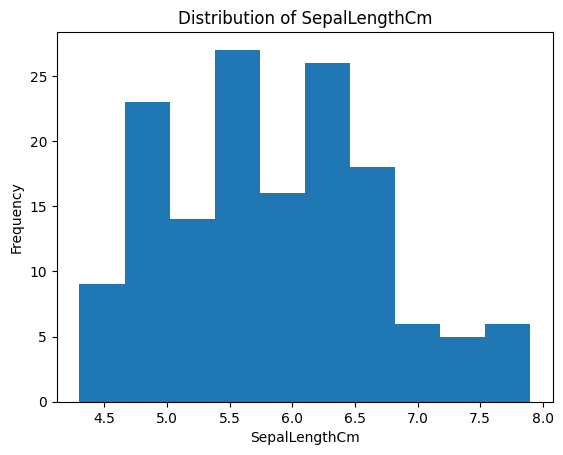

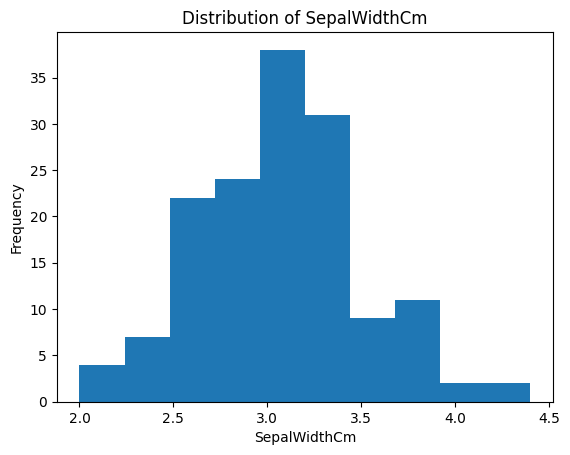

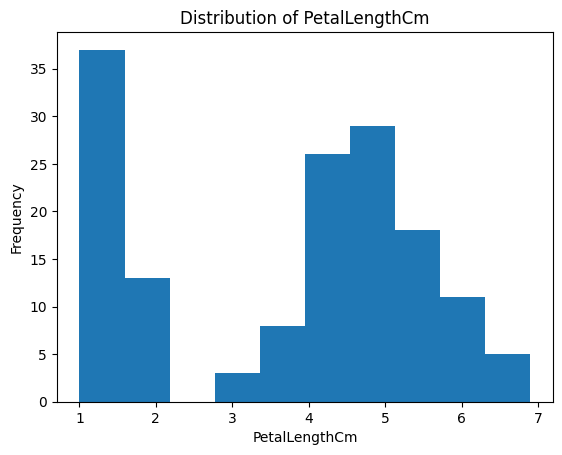

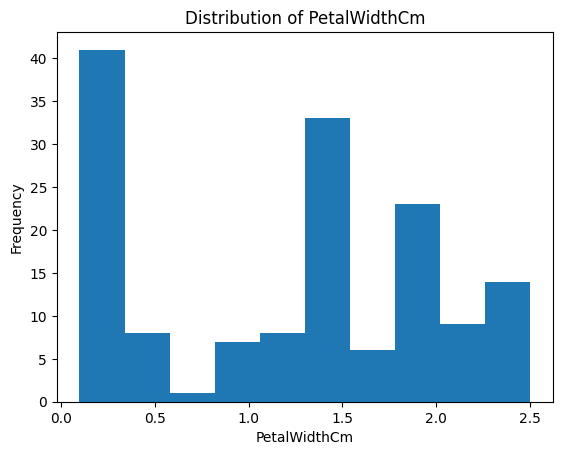

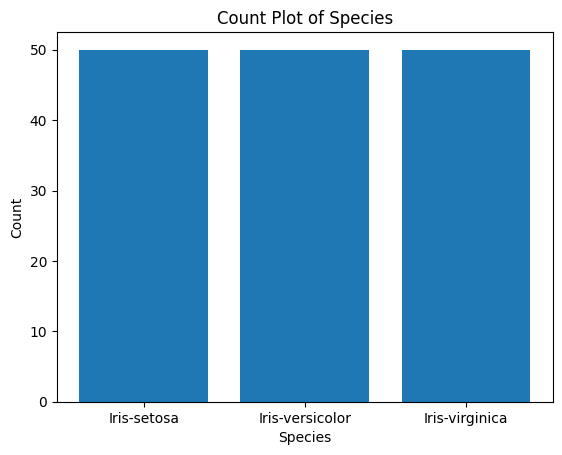

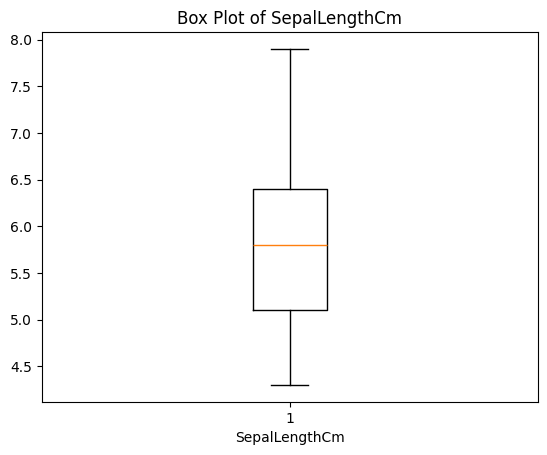

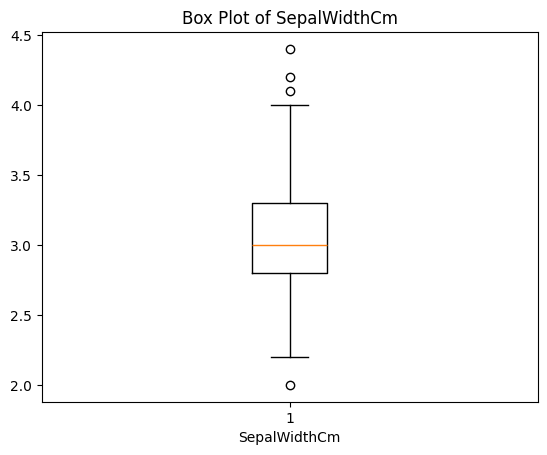

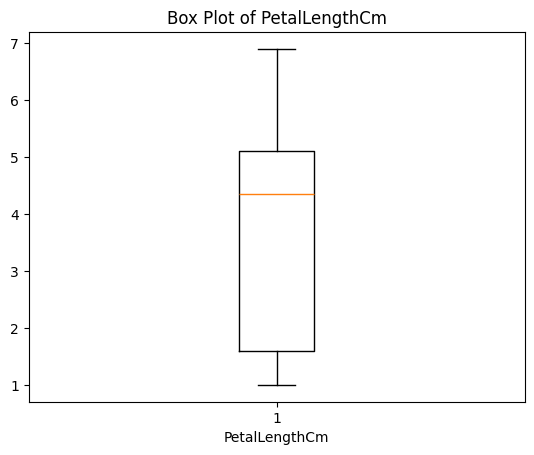

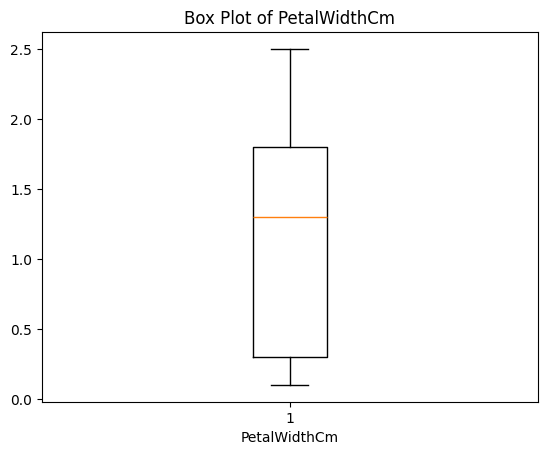

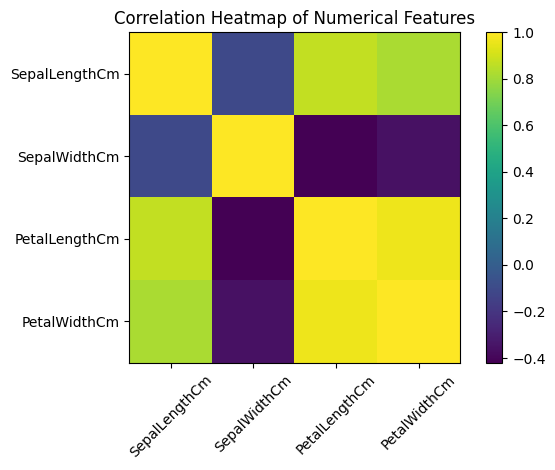

Feature importance based on correlation:

PetalWidthCm     0.956464
PetalLengthCm    0.949043
SepalLengthCm    0.782561
SepalWidthCm    -0.419446
Name: Species_encoded, dtype: float64


In [12]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("Iris.csv")
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
if 'Id' in numerical_cols:
    numerical_cols = numerical_cols.drop('Id')
for col in numerical_cols:
    plt.figure()
    plt.hist(df[col], bins=10)
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.title(f"Distribution of {col}")
    plt.show()
category = 'Species'
counts = df[category].value_counts()

plt.figure()
plt.bar(counts.index, counts.values)
plt.xlabel(category)
plt.ylabel("Count")
plt.title(f"Count Plot of {category}")
plt.show()
for col in numerical_cols:
    plt.figure()
    plt.boxplot(df[col])
    plt.xlabel(col)
    plt.title(f"Box Plot of {col}")
    plt.show()
corr = df[numerical_cols].corr()

plt.figure()
plt.imshow(corr)
plt.colorbar()
plt.xticks(range(len(corr.columns)), corr.columns, rotation=45)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.title("Correlation Heatmap of Numerical Features")
plt.tight_layout()
plt.show()
df['Species_encoded'] = df['Species'].astype('category').cat.codes
corr_target = df[numerical_cols.tolist() + ['Species_encoded']].corr()

feature_importance = corr_target['Species_encoded'].drop('Species_encoded') \
                                                   .sort_values(ascending=False)

print("Feature importance based on correlation:\n")
print(feature_importance)
